In [1]:
# Install necessary libraries
!pip install pandas 
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install folium

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import folium
from scipy.stats import zscore
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [3]:
# Load the datasets
df = pd.read_csv("restaurant.csv")

In [4]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
df.shape

(9551, 21)

In [6]:
missing_value = df.isnull().sum()
missing_value

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
df.loc[:, "Cuisines"] = df["Cuisines"].fillna("Unknown")

In [8]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [10]:
# Count duplicates
duplicates = df.duplicated().sum()
duplicates

0

In [11]:
# Handle Statistics Analysis
# Overview
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [12]:
# Count rating occurences
count_ratings = df["Aggregate rating"].value_counts().sort_index()
count_ratings

Aggregate rating
0.0    2148
1.8       1
1.9       2
2.0       7
2.1      15
2.2      27
2.3      47
2.4      87
2.5     110
2.6     191
2.7     250
2.8     315
2.9     381
3.0     468
3.1     519
3.2     522
3.3     483
3.4     498
3.5     480
3.6     458
3.7     427
3.8     400
3.9     335
4.0     266
4.1     274
4.2     221
4.3     174
4.4     144
4.5      95
4.6      78
4.7      42
4.8      25
4.9      61
Name: count, dtype: int64

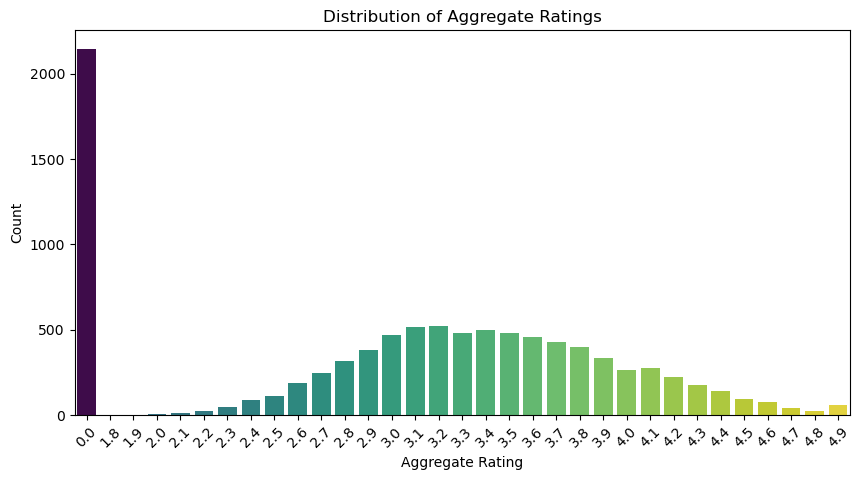

In [13]:
# Distribution plot
plt.figure(figsize=(10, 5))
sns.barplot(x=count_ratings.index, y=count_ratings.values, hue=count_ratings.index, palette="viridis", legend=False)
plt.xlabel("Aggregate Rating")
plt.ylabel("Count")
plt.title("Distribution of Aggregate Ratings")
plt.xticks(rotation=45)
plt.show()

In [14]:
top_cuisines = df["Cuisines"].value_counts().head(5)
top_cuisines

Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Fast Food                354
North Indian, Mughlai    334
Name: count, dtype: int64

In [15]:
top_cities = df["City"].value_counts().head(5)
top_cities

City
New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
Name: count, dtype: int64

In [16]:
top_restaurants = df.sort_values(by=["Aggregate rating", "Votes"], ascending=[False, False]).head(5)
top_restaurants

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
2414,20842,Barbeque Nation,1,Kolkata,"K1, RDB Boulevard, Block EP & GP, Sector 5, Sa...","Sector 5, Salt Lake","Sector 5, Salt Lake, Kolkata",88.433452,22.569358,"North Indian, Chinese",...,Indian Rupees(Rs.),No,No,No,No,3,4.9,Dark Green,Excellent,5966
2307,94286,AB's - Absolute Barbecues,1,Hyderabad,"Plot 483, 4th Floor, Pemmasani Complex, Bajaj ...",Jubilee Hills,"Jubilee Hills, Hyderabad",78.397865,17.438263,"European, Mediterranean, North Indian",...,Indian Rupees(Rs.),No,No,No,No,3,4.9,Dark Green,Excellent,5434
2495,17806994,Mirchi And Mime,1,Mumbai,"Transocean House, Lake Boulevard, Hiranandani ...",Powai,"Powai, Mumbai",72.907385,19.120083,"North Indian, South Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,4.9,Dark Green,Excellent,3244
3013,310143,Naturals Ice Cream,1,New Delhi,"L-8, Outer Circle, Connaught Place, New Delhi",Connaught Place,"Connaught Place, New Delhi",77.222148,28.634348,Ice Cream,...,Indian Rupees(Rs.),No,Yes,No,No,1,4.9,Dark Green,Excellent,2620
374,17580142,McGuire's Irish Pub & Brewery,216,Pensacola,"600 E Gregory Street, Pensacola, FL 32502",Pensacola,"Pensacola, Pensacola",-87.202700,30.417900,"Burger, Bar Food, Steak",...,Dollar($),No,No,No,No,3,4.9,Dark Green,Excellent,2238


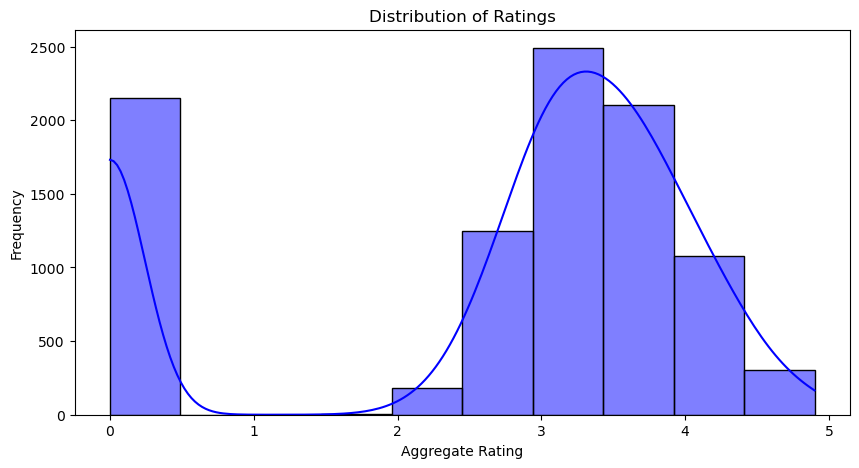

In [17]:
# Plot histogram with Kernel Density Estimate (KDE) for smooth distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["Aggregate rating"], bins=10, kde=True, color="blue")
plt.xlabel("Aggregate Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Ratings")
plt.show()

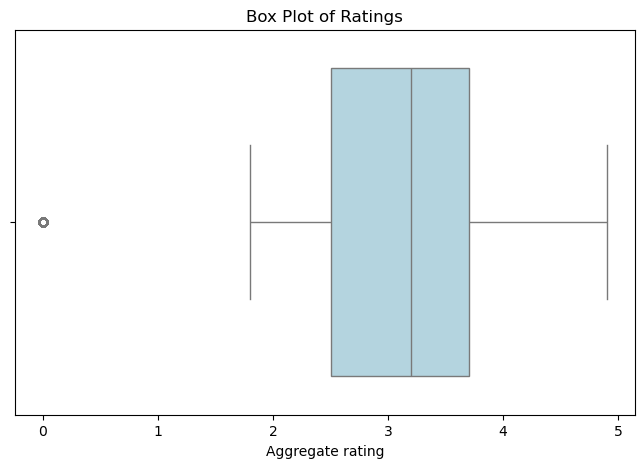

In [18]:
# Box plot for ratings
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Aggregate rating"], color="lightblue")
plt.title("Box Plot of Ratings")
plt.show()

In [19]:
counts_rating = df["Rating text"].value_counts()
counts_rating

Rating text
Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: count, dtype: int64

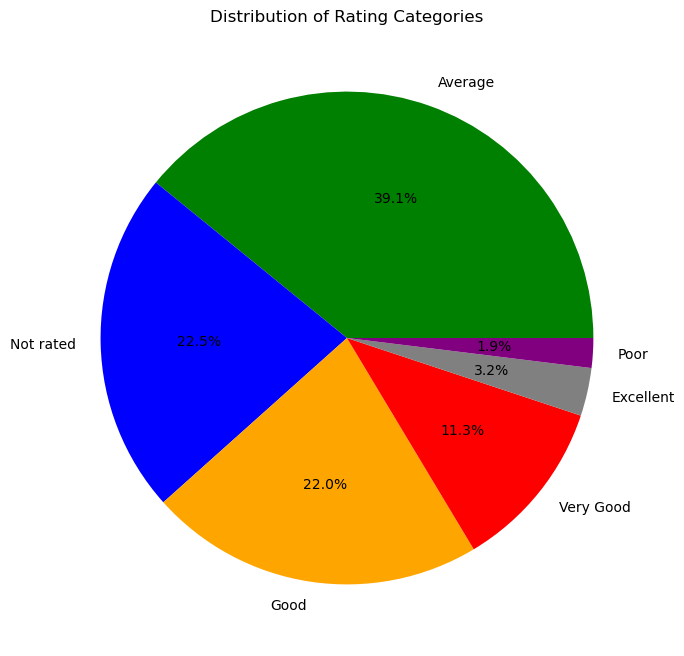

In [20]:
# Pie chart for rating the distributions
plt.figure(figsize=(8, 8))
plt.pie(counts_rating, labels=counts_rating.index, autopct="%1.1f%%", colors=["green", "blue", "orange", "red", "gray", "purple"])
plt.title("Distribution of Rating Categories")
plt.show()

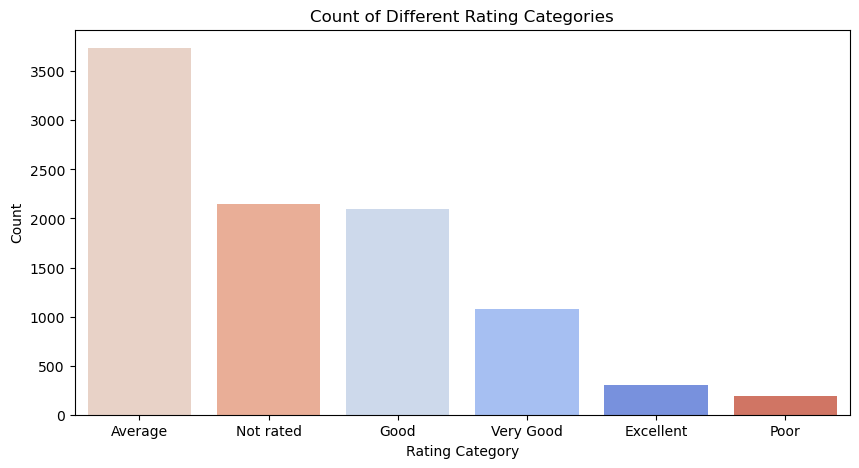

In [21]:
# Countplot for rating labels
plt.figure(figsize=(10, 5))
sns.countplot(x="Rating text", data=df, hue="Rating text", palette="coolwarm", order=df["Rating text"].value_counts().index, legend=False)
plt.xlabel("Rating Category")
plt.ylabel("Count")
plt.title("Count of Different Rating Categories")
plt.show()

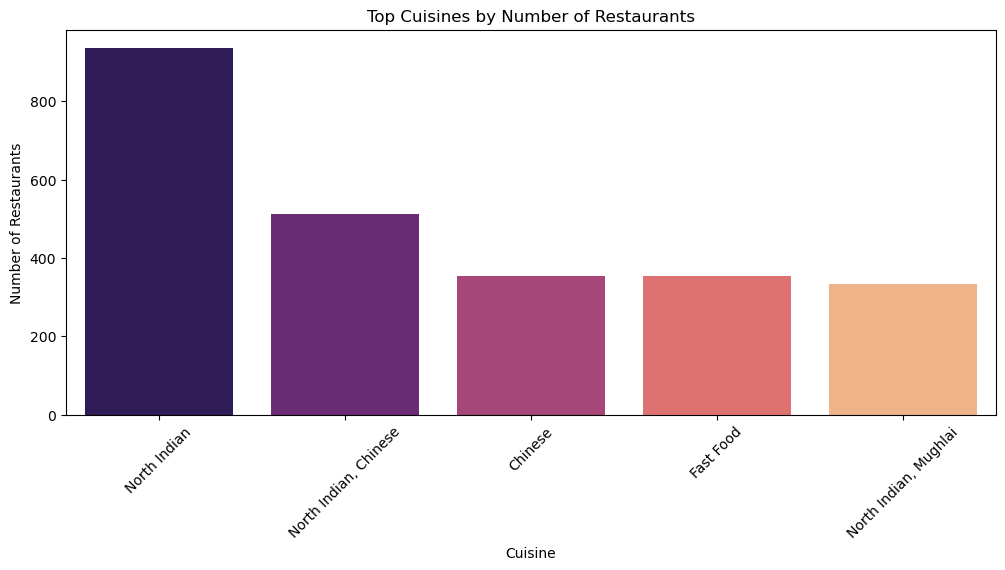

In [22]:
# Top ten most popular cuisine
plt.figure(figsize=(12, 5))
sns.barplot(x=top_cuisines.index, y=top_cuisines.values, hue=top_cuisines.index, palette="magma", legend=False)
plt.xticks(rotation=45)
plt.xlabel("Cuisine")
plt.ylabel("Number of Restaurants")
plt.title("Top Cuisines by Number of Restaurants")
plt.show()

In [23]:
# Count the number of restaurants per type of cuisine
df_cuisines = df["Cuisines"].value_counts()
df_cuisines

Cuisines
North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: count, Length: 1826, dtype: int64

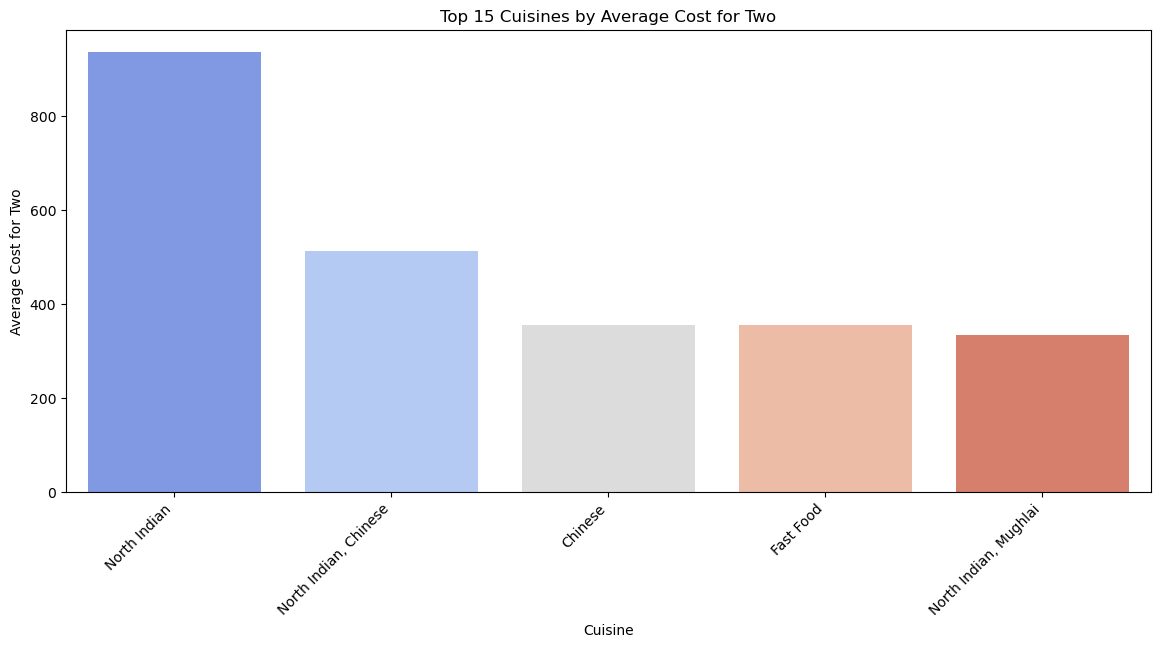

In [24]:
# Average cost vs Cuisine type
plt.figure(figsize=(14, 6))
sns.barplot(x=top_cuisines.index, y=top_cuisines.values, hue=top_cuisines.index, palette="coolwarm", legend=False)
plt.xticks(rotation=45, ha="right")  # Tilt labels
plt.xlabel("Cuisine")
plt.ylabel("Average Cost for Two")
plt.title("Top 15 Cuisines by Average Cost for Two")
plt.show()

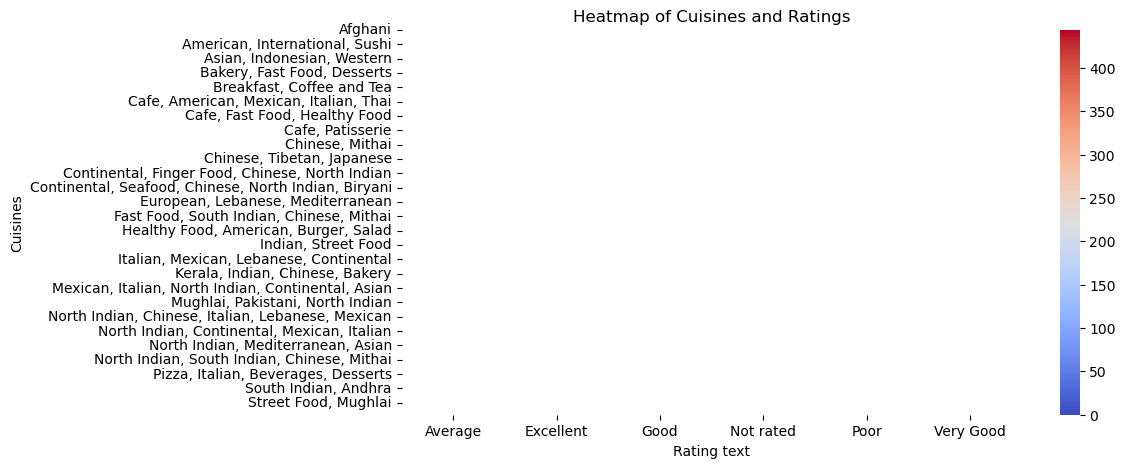

In [25]:
# Heatmap of the cuisine
plt.figure(figsize=(10, 5))
sns.heatmap(df.pivot_table(index="Cuisines", columns="Rating text", aggfunc="size", fill_value=0), cmap="coolwarm", linewidths=1)
plt.title("Heatmap of Cuisines and Ratings")
plt.show()

### Geospatial Analysis

In [27]:
# Heatmap of restaurants location
m = folium.Map(location=[df["Latitude"].mean(), df["Longitude"].mean()], zoom_start=10)
heat_data = list(zip(df["Latitude"], df["Longitude"], df["Aggregate rating"]))
HeatMap(heat_data).add_to(m)
m

In [28]:
# Top ten cities by restaurants
top_cities = df["City"].value_counts().index[:10]
df_filtered = df[df["City"].isin(top_cities)]
df_filtered

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
644,111895,650 - The Global Kitchen,1,Ahmedabad,"Shreekunj Mandapam, Beside Golden Tulip Bunglo...",Ambavadi,"Ambavadi, Ahmedabad",72.537574,23.010451,"Chinese, Italian, North Indian, Mexican, Medit...",...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,1582
645,110502,Patang - The Revolving Restaurant,1,Ahmedabad,"Chinubhai Tower, Nehru Bridge Corner, Ashram R...",Ashram Road,"Ashram Road, Ahmedabad",72.572009,23.026165,"Continental, Chinese, North Indian",...,Indian Rupees(Rs.),No,No,No,No,4,3.7,Yellow,Good,1315
646,18396250,Huber & Holly,1,Ahmedabad,"7 B, Circle B, Opposite Rajpath Club, Sarkhej...",Bodakdev,"Bodakdev, Ahmedabad",72.512395,23.038311,"Ice Cream, Desserts, Continental",...,Indian Rupees(Rs.),No,Yes,No,No,1,4.5,Dark Green,Excellent,217
647,113702,@Mango,1,Ahmedabad,"Opposite Sindhu Bhawan, Bodakdev, Ahmedabad",Bodakdev,"Bodakdev, Ahmedabad",72.501764,23.040163,"North Indian, Continental, Mexican, Italian",...,Indian Rupees(Rs.),No,No,No,No,3,4.1,Green,Very Good,769
648,113433,Fozzie's Pizzaiolo,1,Ahmedabad,"Ground Floor, Maruti Crystal, Opposite Rajpath...",Bodakdev,"Bodakdev, Ahmedabad",72.509806,23.033069,"Pizza, Italian, Beverages, Desserts",...,Indian Rupees(Rs.),No,Yes,No,No,3,4.3,Green,Very Good,731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9108,18255134,Sky Grill,1,Noida,"2nd Floor, Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367524,28.557537,"North Indian, Chinese",...,Indian Rupees(Rs.),No,Yes,No,No,2,2.6,Orange,Average,34
9109,18277023,Bread & Pasta,1,Noida,"Shop 15, Near HDFC Bank, Tulip Mall, Sector 48...","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367303,28.557929,Fast Food,...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,1
9110,18313203,Chillies Cafe,1,Noida,"G-11, Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367188,28.557842,Fast Food,...,Indian Rupees(Rs.),No,No,No,No,2,0.0,White,Not rated,3
9111,18254559,Platters,1,Noida,"Shop 1, Tulip Mall, Near HDFC Bank, Sector 48,...","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367322,28.557930,"North Indian, Chinese",...,Indian Rupees(Rs.),No,No,No,No,2,0.0,White,Not rated,0


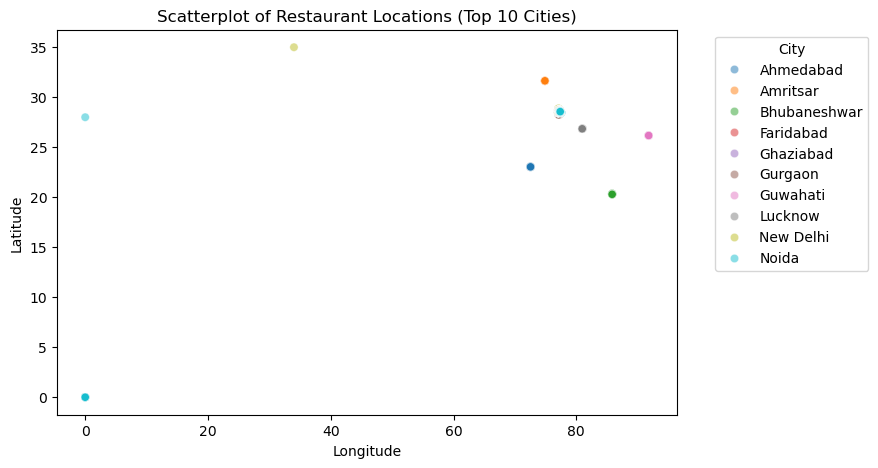

In [29]:
# Scatterplot of Latitude vs. Longitude
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_filtered["Longitude"], y=df_filtered["Latitude"], hue=df_filtered["City"], alpha=0.5, palette="tab10")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Scatterplot of Restaurant Locations (Top 10 Cities)")
plt.legend(title="City", bbox_to_anchor=(1.05, 1), loc="upper left")  # Move legend outside
plt.show()

### Additional Insights

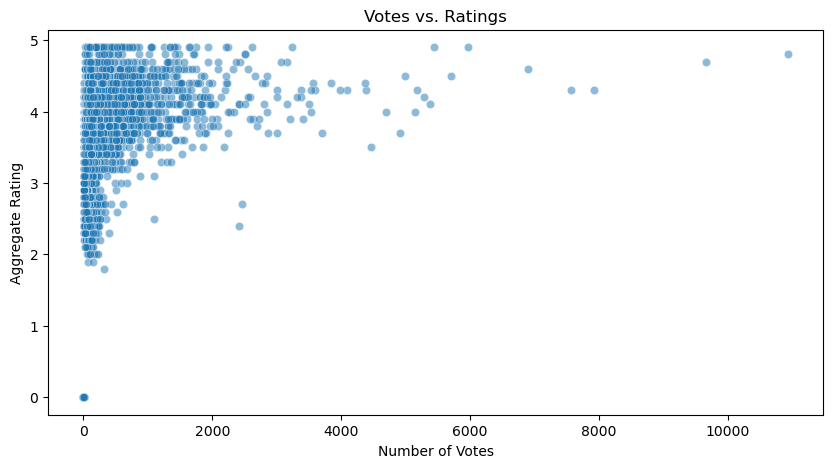

In [31]:
# votes vs ratings
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["Votes"], y=df["Aggregate rating"], alpha=0.5)
plt.xlabel("Number of Votes")
plt.ylabel("Aggregate Rating")
plt.title("Votes vs. Ratings")
plt.show()

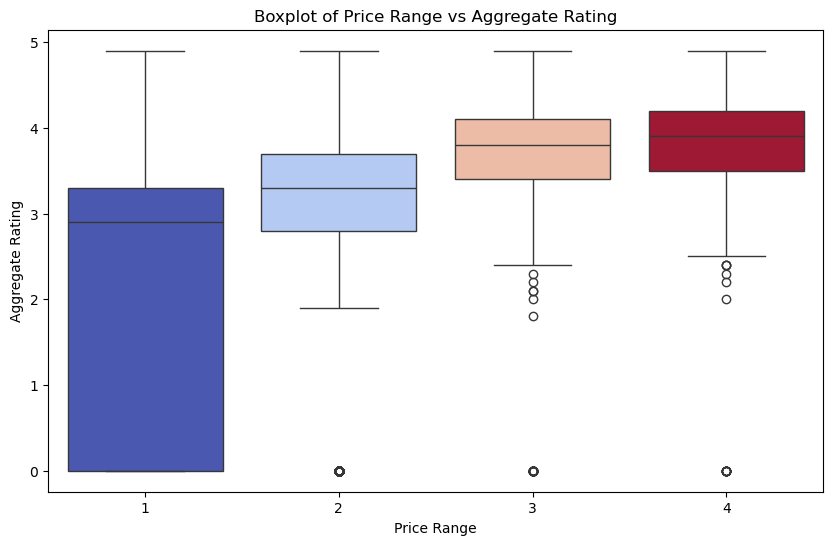

In [32]:
# Price range vs rating
plt.figure(figsize=(10, 6))
sns.boxplot(x="Price range", y="Aggregate rating", data=df, hue="Price range", palette="coolwarm", legend=False)
plt.xlabel("Price Range")
plt.ylabel("Aggregate Rating")
plt.title("Boxplot of Price Range vs Aggregate Rating")
plt.show()

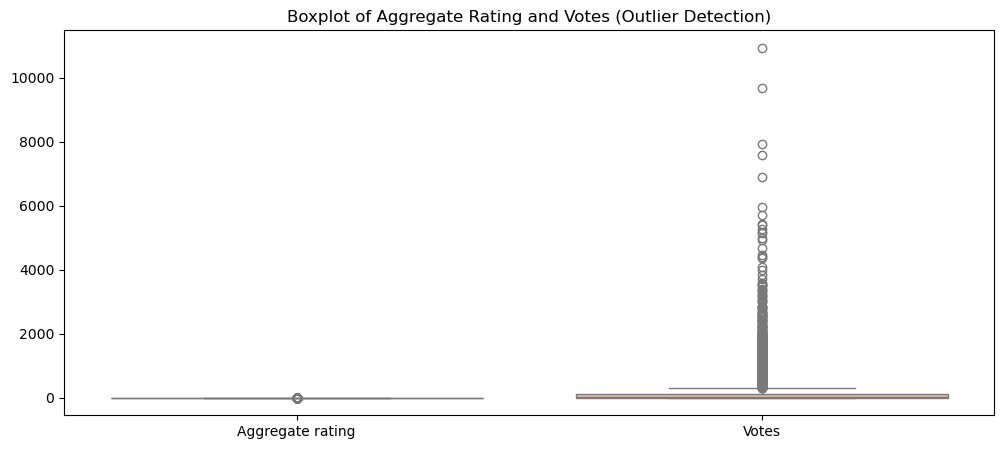

In [33]:
# Outlier Detection using Boxplots
plt.figure(figsize=(12, 5))
sns.boxplot(data=df[["Aggregate rating", "Votes"]], palette="coolwarm")
plt.title("Boxplot of Aggregate Rating and Votes (Outlier Detection)")
plt.show()

In [34]:
# Outlier Detection using Z-Score
z_scores = np.abs(zscore(df[["Aggregate rating", "Votes"]]))  # Compute z-scores
outliers = df[(z_scores > 3).any(axis=1)] 
outliers.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
103,17293281,Last Resort Grill,216,Athens,"184 W Clayton St, Athens, GA 30601",Athens,"Athens, Athens",-83.378273,33.957999,"American, Southern, Southwestern",...,Dollar($),No,No,No,No,3,4.5,Dark Green,Excellent,1821
355,17060869,Texas de Brazil,216,Orlando,"5259 International Drive, Orlando, FL 32819",I-Drive/Universal,"I-Drive/Universal, Orlando",-81.451072,28.467681,"Brazilian, Steak",...,Dollar($),No,No,No,No,4,4.6,Dark Green,Excellent,2324
360,17060516,Seasons 52 Fresh Grill,216,Orlando,"7700 West Sand Lake Road, Orlando, FL 32819",Restaurant Row,"Restaurant Row, Orlando",-81.487978,28.448175,American,...,Dollar($),No,No,No,No,4,4.4,Green,Very Good,1685
361,17059012,Hollerbach's Willow Tree Caf��,216,Orlando,"205 East 1st Street, Sanford, FL 32771",Sanford,"Sanford, Orlando",-81.266871,28.811653,German,...,Dollar($),No,No,No,No,3,4.8,Dark Green,Excellent,1699
362,17061296,Pom Pom's Teahouse and Sandwicheria,216,Orlando,"67 North Bumby Avenue, Orlando, FL 32803",The Milk District,"The Milk District, Orlando",-81.351467,28.543571,"American, Sandwich, Tea",...,Dollar($),No,No,No,No,2,4.9,Dark Green,Excellent,1457


In [35]:
# Calculating Interquartile Range (IQR)
Q1 = df["Aggregate rating"].quantile(0.25)
Q3 = df["Aggregate rating"].quantile(0.75)
IQR = Q3 - Q1
IQR

1.2000000000000002

In [36]:
# Defining outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [37]:
# Find the outliers
outliers = df[(df["Aggregate rating"] < lower_bound) | (df["Aggregate rating"] > upper_bound)]
len(outliers)

2148

In [38]:
# Top 5 restaurants based on Aggregate Rating and Vote
top_restaurants = df.sort_values(by=["Aggregate rating", "Votes"], ascending=[False, False]).head(5)
top_restaurants

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
2414,20842,Barbeque Nation,1,Kolkata,"K1, RDB Boulevard, Block EP & GP, Sector 5, Sa...","Sector 5, Salt Lake","Sector 5, Salt Lake, Kolkata",88.433452,22.569358,"North Indian, Chinese",...,Indian Rupees(Rs.),No,No,No,No,3,4.9,Dark Green,Excellent,5966
2307,94286,AB's - Absolute Barbecues,1,Hyderabad,"Plot 483, 4th Floor, Pemmasani Complex, Bajaj ...",Jubilee Hills,"Jubilee Hills, Hyderabad",78.397865,17.438263,"European, Mediterranean, North Indian",...,Indian Rupees(Rs.),No,No,No,No,3,4.9,Dark Green,Excellent,5434
2495,17806994,Mirchi And Mime,1,Mumbai,"Transocean House, Lake Boulevard, Hiranandani ...",Powai,"Powai, Mumbai",72.907385,19.120083,"North Indian, South Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,4.9,Dark Green,Excellent,3244
3013,310143,Naturals Ice Cream,1,New Delhi,"L-8, Outer Circle, Connaught Place, New Delhi",Connaught Place,"Connaught Place, New Delhi",77.222148,28.634348,Ice Cream,...,Indian Rupees(Rs.),No,Yes,No,No,1,4.9,Dark Green,Excellent,2620
374,17580142,McGuire's Irish Pub & Brewery,216,Pensacola,"600 E Gregory Street, Pensacola, FL 32502",Pensacola,"Pensacola, Pensacola",-87.202700,30.417900,"Burger, Bar Food, Steak",...,Dollar($),No,No,No,No,3,4.9,Dark Green,Excellent,2238


In [39]:
# Cuisine Analysis - Highest Rated Cuisines
top_rated_cuisines = df.explode("Cuisines").groupby("Cuisines")["Aggregate rating"].mean().sort_values(ascending=False).head(15)
top_rated_cuisines

Cuisines
Continental, Indian                4.9
BBQ, Breakfast, Southern           4.9
Italian, Deli                      4.9
American, Caribbean, Seafood       4.9
Burger, Bar Food, Steak            4.9
American, Burger, Grill            4.9
Italian, Bakery, Continental       4.9
European, Asian, Indian            4.9
European, Contemporary             4.9
American, Coffee and Tea           4.9
European, German                   4.9
Mexican, American, Healthy Food    4.9
Hawaiian, Seafood                  4.9
American, Sandwich, Tea            4.9
American, BBQ, Sandwich            4.9
Name: Aggregate rating, dtype: float64

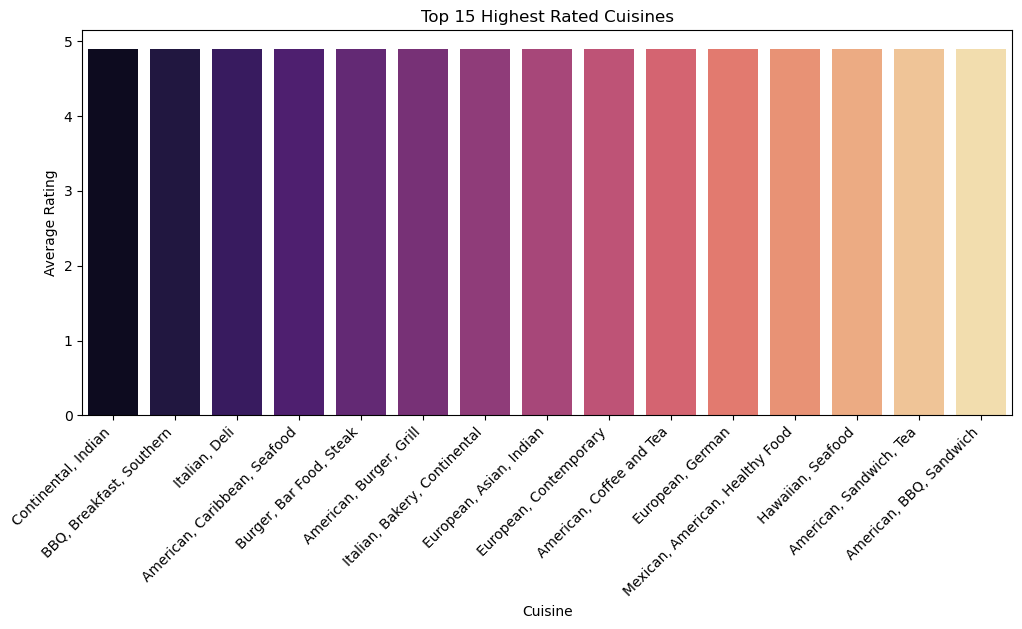

In [40]:
# Highest rated cuisines
plt.figure(figsize=(12, 5))
sns.barplot(x=top_rated_cuisines.index, y=top_rated_cuisines.values, hue=top_rated_cuisines.index, palette="magma", legend=False)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Cuisine")
plt.ylabel("Average Rating")
plt.title("Top 15 Highest Rated Cuisines")
plt.show()

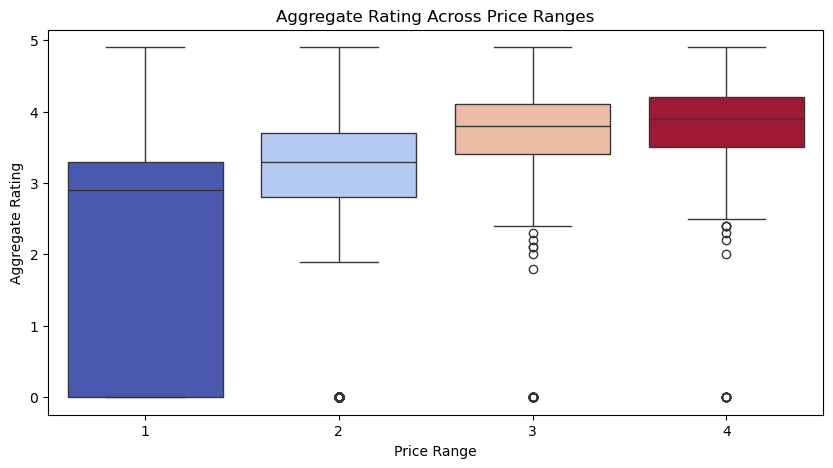

In [41]:
# Comparing range across price point
plt.figure(figsize=(10, 5))
sns.boxplot(x="Price range", y="Aggregate rating", data=df, hue="Price range", palette="coolwarm", legend=False)
plt.xlabel("Price Range")
plt.ylabel("Aggregate Rating")
plt.title("Aggregate Rating Across Price Ranges")
plt.show()

In [42]:
# Relationship between cuisine and vote
top_voted_cuisines = df.explode("Cuisines").groupby("Cuisines")["Votes"].sum().sort_values(ascending=False).head(15)
top_voted_cuisines

Cuisines
North Indian, Mughlai                         53747
North Indian                                  46241
North Indian, Chinese                         42012
Cafe                                          30657
Chinese                                       21925
North Indian, Mughlai, Chinese                20115
Fast Food                                     17852
South Indian                                  16433
Mughlai, North Indian                         15275
Italian                                       14799
European, Mediterranean, North Indian         12541
Modern Indian                                 12355
Chinese, Thai                                 12354
Pizza                                         11537
Continental, American, Asian, North Indian    11404
Name: Votes, dtype: int64

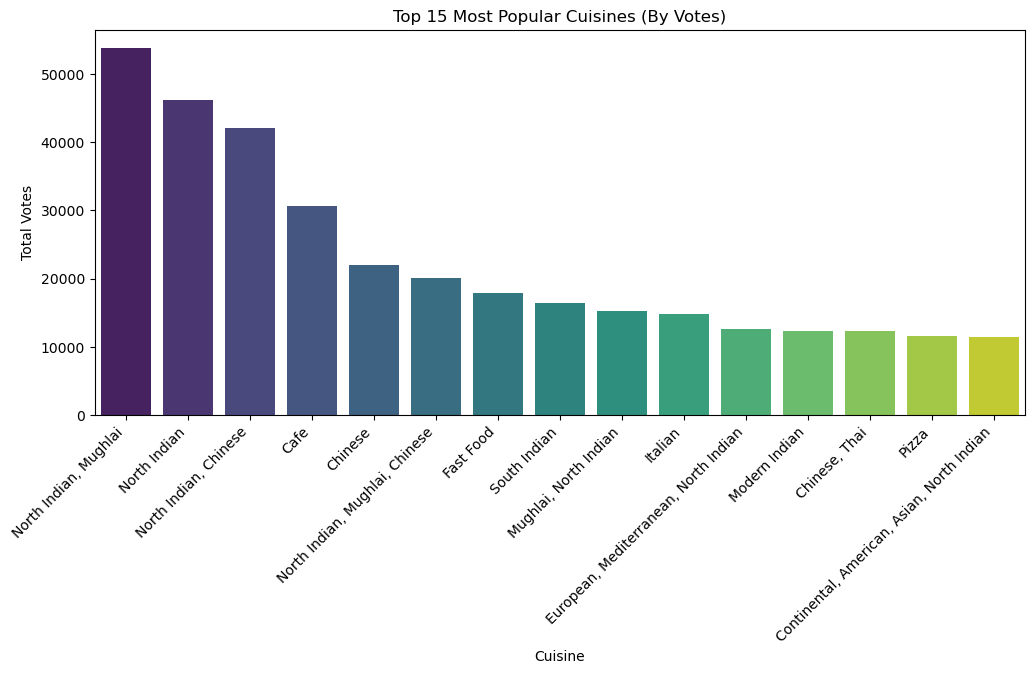

In [43]:
plt.figure(figsize=(12, 5))
sns.barplot(x=top_voted_cuisines.index, y=top_voted_cuisines.values, hue=top_voted_cuisines.index, palette="viridis", legend=False)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Cuisine")
plt.ylabel("Total Votes")
plt.title("Top 15 Most Popular Cuisines (By Votes)")
plt.show()

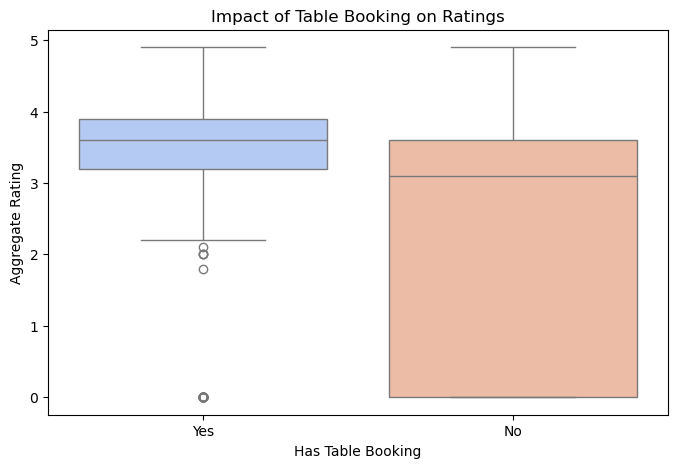

In [44]:
# Restaurants with and without table bookings
plt.figure(figsize=(8, 5))
sns.boxplot(x="Has Table booking", y="Aggregate rating", data=df, hue="Has Table booking", palette="coolwarm", legend=False)
plt.xlabel("Has Table Booking")
plt.ylabel("Aggregate Rating")
plt.title("Impact of Table Booking on Ratings")
plt.show()

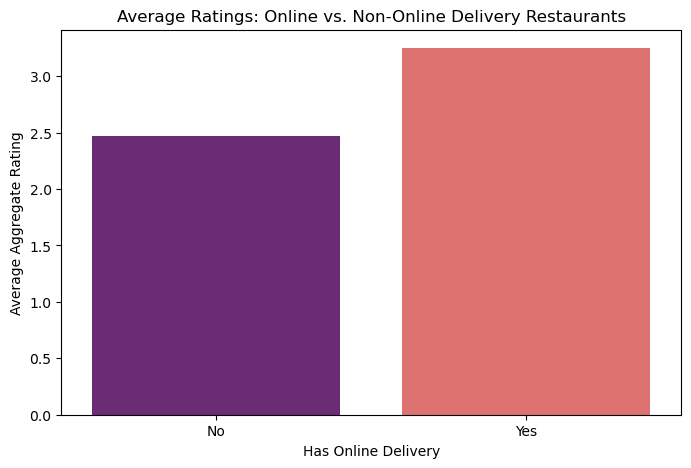

In [45]:
# Restaurants with and without online deliveries
plt.figure(figsize=(8, 5))
avg_ratings = df.groupby("Has Online delivery")["Aggregate rating"].mean().reset_index()
sns.barplot(x="Has Online delivery", y="Aggregate rating", data=avg_ratings, hue="Has Online delivery", palette="magma", legend=False)
plt.xlabel("Has Online Delivery")
plt.ylabel("Average Aggregate Rating")
plt.title("Average Ratings: Online vs. Non-Online Delivery Restaurants")
plt.show()

In [46]:
# Grouping City and Table Booking feature
# Also calculating the average rating
table_booking_impact = df.groupby(["City", "Has Table booking"])["Aggregate rating"].mean().unstack().head(20)
table_booking_impact

Has Table booking,No,Yes
City,,
Abu Dhabi,4.235714,4.450000
Agra,3.965000,NaN
Ahmedabad,4.161905,NaN
Albany,3.555000,NaN
Allahabad,3.395000,NaN
Amritsar,3.685714,NaN
Ankara,4.305000,NaN
Armidale,3.500000,NaN
Athens,4.200000,NaN


<Figure size 1200x500 with 0 Axes>

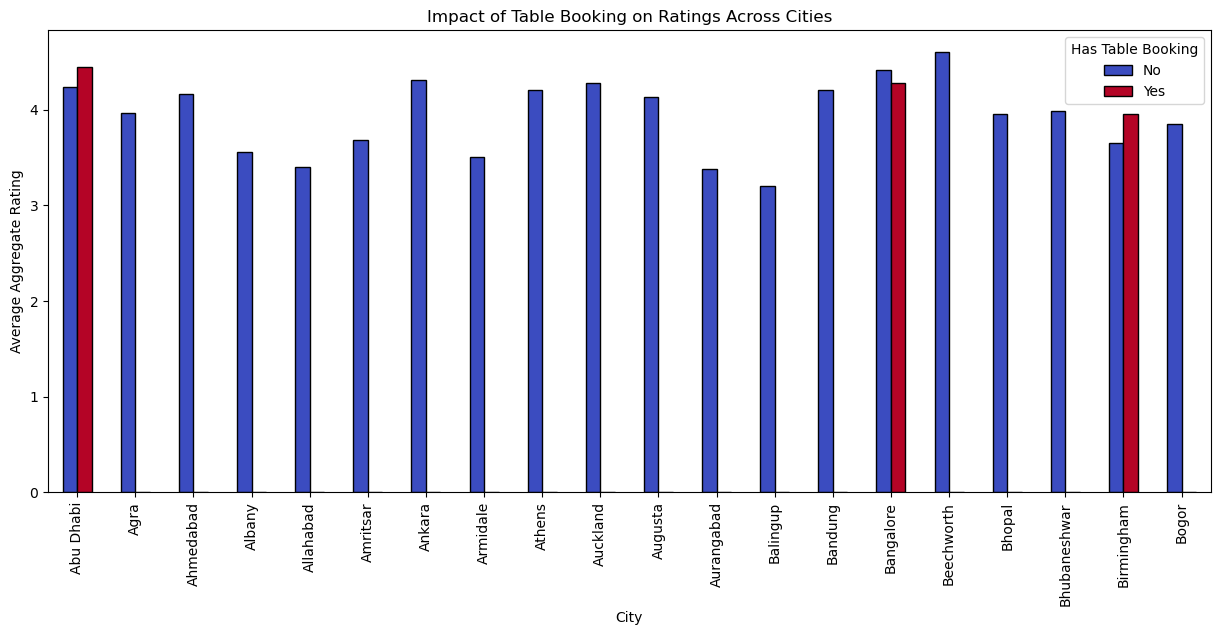

In [47]:
# Plotting table booking impact
plt.figure(figsize=(12, 5))
table_booking_impact.plot(kind="bar", figsize=(15, 6), colormap="coolwarm", edgecolor="black")
plt.xlabel("City")
plt.ylabel("Average Aggregate Rating")
plt.title("Impact of Table Booking on Ratings Across Cities")
plt.xticks(rotation=90)
plt.legend(title="Has Table Booking", labels=["No", "Yes"])
plt.show()

In [48]:
# Percentage of restaurants with online delivery
online_delivery_percentage = df["Has Online delivery"].value_counts(normalize=True).mul(100).round(0)
online_delivery_percentage

Has Online delivery
No     74.0
Yes    26.0
Name: proportion, dtype: float64

In [49]:
# Online delivery availability across price ranges
delivery_by_price = df.groupby("Price range")["Has Online delivery"].value_counts(normalize=True).unstack() * 100
delivery_by_price

Has Online delivery,No,Yes
Price range,,
1,84.225923,15.774077
2,58.689367,41.310633
3,70.809659,29.190341
4,90.955631,9.044369


<Figure size 800x500 with 0 Axes>

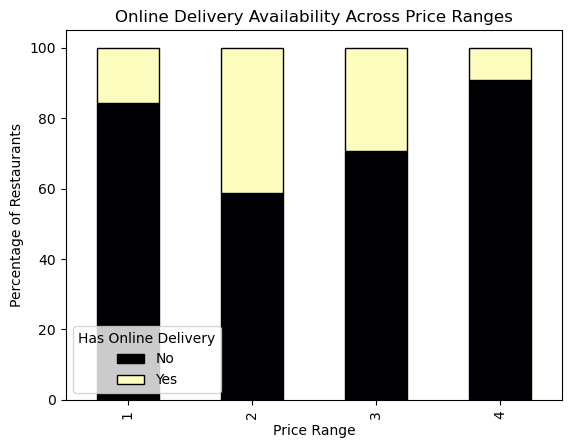

In [50]:
# Online delivery analysis
plt.figure(figsize=(8, 5))
delivery_by_price.plot(kind="bar", stacked=True, colormap="magma", edgecolor="black")
plt.xlabel("Price Range")
plt.ylabel("Percentage of Restaurants")
plt.title("Online Delivery Availability Across Price Ranges")
plt.legend(title="Has Online Delivery", labels=["No", "Yes"])
plt.show()

In [51]:
# Top-rated cuisines
top_cuisine_ratings = df.groupby("Cuisines")["Aggregate rating"].mean().sort_values(ascending=False).head(10)
top_cuisine_ratings

Cuisines
Continental, Indian             4.9
BBQ, Breakfast, Southern        4.9
Italian, Deli                   4.9
American, Caribbean, Seafood    4.9
Burger, Bar Food, Steak         4.9
American, Burger, Grill         4.9
Italian, Bakery, Continental    4.9
European, Asian, Indian         4.9
European, Contemporary          4.9
American, Coffee and Tea        4.9
Name: Aggregate rating, dtype: float64

In [52]:
# City specific cuisine preferences
popular_cuisine_city = df.groupby("City")["Cuisines"].agg(lambda x: x.value_counts().idxmax())
popular_cuisine_city

City
Abu Dhabi                                                   American
Agra                                           North Indian, Mughlai
Ahmedabad          Chinese, Italian, North Indian, Mexican, Medit...
Albany                                                       Unknown
Allahabad                                      North Indian, Chinese
                                         ...                        
Weirton                                      Burger, Greek, Sandwich
Wellington City                                                 Cafe
Winchester Bay                                Burger, Seafood, Steak
Yorkton                                                        Asian
��stanbul                                                       Cafe
Name: Cuisines, Length: 141, dtype: object

In [53]:
df_encoded = df.copy()

# Convert categorical columns into numerical format
categorical_column = ["Has Online delivery", "Has Table booking", "Price range", "City"]

for col in categorical_column:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Create a new feature for the number of cuisines
df_encoded["Num_Cuisines"] = df["Cuisines"].apply(lambda x: len(str(x).split(", ")))

# Check if df_encoded is correctly created
df_encoded.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Num_Cuisines
0,6317637,Le Petit Souffle,162,73,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,1,0,No,No,2,4.8,Dark Green,Excellent,314,3
1,6304287,Izakaya Kikufuji,162,73,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,1,0,No,No,2,4.5,Dark Green,Excellent,591,1
2,6300002,Heat - Edsa Shangri-La,162,75,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,1,0,No,No,3,4.4,Green,Very Good,270,4
3,6318506,Ooma,162,75,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,0,0,No,No,3,4.9,Dark Green,Excellent,365,2
4,6314302,Sambo Kojin,162,75,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,1,0,No,No,3,4.8,Dark Green,Excellent,229,2


In [54]:
# Define features (X) and target variable (y)
X = df_encoded.drop(columns=["Aggregate rating"])
y = df_encoded["Aggregate rating"]

non_numeric_cols = X.select_dtypes(include=["object"]).columns.tolist()
non_numeric_cols

['Restaurant Name',
 'Address',
 'Locality',
 'Locality Verbose',
 'Cuisines',
 'Currency',
 'Is delivering now',
 'Switch to order menu',
 'Rating color',
 'Rating text']

In [55]:
X = pd.get_dummies(X, columns=non_numeric_cols, drop_first=True)
X

,Restaurant ID,Country Code,City,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Price range,Votes,...,Rating color_Green,Rating color_Orange,Rating color_Red,Rating color_White,Rating color_Yellow,Rating text_Excellent,Rating text_Good,Rating text_Not rated,Rating text_Poor,Rating text_Very Good
0,6317637,162,73,121.027535,14.565443,1100,1,0,2,314,...,False,False,False,False,False,True,False,False,False,False
1,6304287,162,73,121.014101,14.553708,1200,1,0,2,591,...,False,False,False,False,False,True,False,False,False,False
2,6300002,162,75,121.056831,14.581404,4000,1,0,3,270,...,True,False,False,False,False,False,False,False,False,True
3,6318506,162,75,121.056475,14.585318,1500,0,0,3,365,...,False,False,False,False,False,True,False,False,False,False
4,6314302,162,75,121.057508,14.584450,1500,1,0,3,229,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,208,140,28.977392,41.022793,80,0,0,2,788,...,True,False,False,False,False,False,False,False,False,True
9547,5908749,208,140,29.041297,41.009847,105,0,0,2,1034,...,True,False,False,False,False,False,False,False,False,True
9548,5915807,208,140,29.034640,41.055817,170,0,0,3,661,...,False,False,False,False,True,False,True,False,False,False
9549,5916112,208,140,29.036019,41.057979,120,0,0,3,901,...,True,False,False,False,False,False,False,False,False,True


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [58]:
# Train models
lin_reg = LinearRegression()
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

lin_reg.fit(X_train, y_train)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [59]:
y_pred_lin = lin_reg.predict(X_test)
y_pred_rf = rf_reg.predict(X_test)

In [60]:
# Evaluation metrics
def evaluate_model(y_test, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{model_name} Performance:")
    print(f"RMSE: {rmse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")
    print("-" * 50)

In [61]:
# Compare models
evaluate_model(y_test, y_pred_lin, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")

Linear Regression Performance:
RMSE: 6414.2403, MAE: 1548.2995, R²: -18075793.5239
--------------------------------------------------
Random Forest Regressor Performance:
RMSE: 0.1633, MAE: 0.1085, R²: 0.9883
--------------------------------------------------
